In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    state['result'] = f"Hey {state['name']}, Welcome to the system!"
    return state

def second_node(state: AgentState) -> AgentState:
    if state['age'] < 18:
        state['result'] += " You are classified as a minor."
    else:
        state['result'] += " You are classified as an adult."
    return state

def third_node(state: AgentState) -> AgentState:
    skill_list = ', '.join(state['skills'])
    state['result'] += f" Your skills include: {skill_list}."
    return state

In [4]:
graph = StateGraph(AgentState)
graph.add_node("firstNode", first_node)
graph.add_node("secondNode", second_node)
graph.add_node("thirdNode", third_node)

graph.set_entry_point("firstNode")
graph.add_edge("firstNode", "secondNode")
graph.add_edge("secondNode", "thirdNode")
graph.set_finish_point("thirdNode")
app = graph.compile()

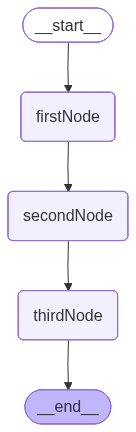

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
answer = app.invoke({
    "name": "Alice",
    "age": 20,
    "skills": ["Python", "Data Analysis"],})

print(answer['result'])

Hey Alice, Welcome to the system! You are classified as an adult. Your skills include: Python, Data Analysis.
